In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e12/sample_submission.csv
/kaggle/input/playground-series-s5e12/train.csv
/kaggle/input/playground-series-s5e12/test.csv


## Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Importing the Data

In [3]:
df_train = pd.read_csv('/kaggle/input/playground-series-s5e12/train.csv')
df_train.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [4]:
df_test = pd.read_csv('/kaggle/input/playground-series-s5e12/test.csv')
df_test.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,...,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,...,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0
2,700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,...,184,Male,White,Highschool,Low,Never,Employed,0,0,0
3,700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,...,128,Male,White,Graduate,Middle,Former,Employed,0,0,0
4,700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,...,133,Male,White,Graduate,Low,Current,Unemployed,0,0,0


In [5]:
ids = df_test['id']

## Exploratory Data Analysis

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [7]:
df_train.describe()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df_train.isna().sum()

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


In [9]:
df_test.isna().sum()

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


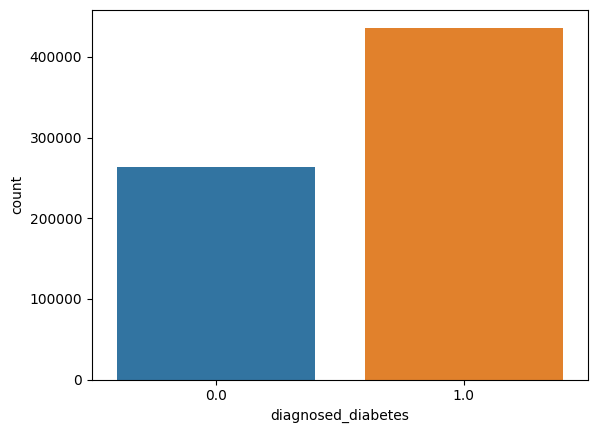

In [10]:
sns.countplot(x=df_train['diagnosed_diabetes'])
plt.show()

## Feature Engineering

In [11]:
"""df_train['bp_stage1'] = ((df_train['systolic_bp'] >= 130) | (df_train['diastolic_bp'] >= 80)).astype(int)
df_train['bp_stage2'] = ((df_train['systolic_bp'] >= 140) | (df_train['diastolic_bp'] >= 90)).astype(int)"""
df_train['pulse_pressure'] = df_train['systolic_bp'] - df_train['diastolic_bp']

"""df_test['bp_stage1'] = ((df_test['systolic_bp'] >= 130) | (df_test['diastolic_bp'] >= 80)).astype(int)
df_test['bp_stage2'] = ((df_test['systolic_bp'] >= 140) | (df_test['diastolic_bp'] >= 90)).astype(int)"""
df_test['pulse_pressure'] = df_test['systolic_bp'] - df_test['diastolic_bp']

In [12]:
##df_train['bmi_squared'] = df_train['bmi'] ** 2

"""df_train['bmi_under'] = (df_train['bmi'] < 18.5).astype(int)
df_train['bmi_normal'] = ((df_train['bmi'] >= 18.5) & (df_train['bmi'] < 25)).astype(int)
df_train['bmi_over'] = ((df_train['bmi'] >= 25) & (df_train['bmi'] < 30)).astype(int)
df_train['bmi_obese'] = (df_train['bmi'] >= 30).astype(int)"""

df_train['central_obesity'] = ((df_train['waist_to_hip_ratio'] > 0.9) & (df_train['gender'] == 'Male')) | \
                        ((df_train['waist_to_hip_ratio'] > 0.85) & (df_train['gender'] == 'Female'))
df_train['central_obesity'] = df_train['central_obesity'].astype(int)


##df_test['bmi_squared'] = df_test['bmi'] ** 2

"""df_test['bmi_under'] = (df_test['bmi'] < 18.5).astype(int)
df_test['bmi_normal'] = ((df_test['bmi'] >= 18.5) & (df_test['bmi'] < 25)).astype(int)
df_test['bmi_over'] = ((df_test['bmi'] >= 25) & (df_test['bmi'] < 30)).astype(int)
df_test['bmi_obese'] = (df_test['bmi'] >= 30).astype(int)"""

df_test['central_obesity'] = ((df_test['waist_to_hip_ratio'] > 0.9) & (df_test['gender'] == 'Male')) | \
                        ((df_test['waist_to_hip_ratio'] > 0.85) & (df_test['gender'] == 'Female'))
df_test['central_obesity'] = df_test['central_obesity'].astype(int)

In [13]:
df_train['chol_hdl_ratio'] = df_train['cholesterol_total'] / (df_train['hdl_cholesterol'] + 1)
df_train['ldl_hdl_ratio']  = df_train['ldl_cholesterol'] / (df_train['hdl_cholesterol'] + 1)
df_train['trig_hdl_ratio'] = df_train['triglycerides'] / (df_train['hdl_cholesterol'] + 1)

df_train['atherogenic'] = (df_train['triglycerides'] > 150).astype(int)


df_test['chol_hdl_ratio'] = df_test['cholesterol_total'] / (df_test['hdl_cholesterol'] + 1)
df_test['ldl_hdl_ratio']  = df_test['ldl_cholesterol'] / (df_test['hdl_cholesterol'] + 1)
df_test['trig_hdl_ratio'] = df_test['triglycerides'] / (df_test['hdl_cholesterol'] + 1)

df_test['atherogenic'] = (df_test['triglycerides'] > 150).astype(int)

In [14]:
df_train['sedentary'] = (df_train['physical_activity_minutes_per_week'] < 150).astype(int)
df_train['poor_sleep'] = ((df_train['sleep_hours_per_day'] < 6) | (df_train['sleep_hours_per_day'] > 9)).astype(int)
df_train['high_screen'] = (df_train['screen_time_hours_per_day'] > 8).astype(int)
df_train['heavy_alcohol'] = (df_train['alcohol_consumption_per_week'] > 14).astype(int)

df_train['lifestyle_risk'] = (
    2*df_train['sedentary'] +
    df_train['poor_sleep'] +
    1.5*df_train['high_screen'] +
    df_train['heavy_alcohol']
    )



df_test['sedentary'] = (df_test['physical_activity_minutes_per_week'] < 150).astype(int)
df_test['poor_sleep'] = ((df_test['sleep_hours_per_day'] < 6) | (df_test['sleep_hours_per_day'] > 9)).astype(int)
df_test['high_screen'] = (df_test['screen_time_hours_per_day'] > 8).astype(int)
df_test['heavy_alcohol'] = (df_test['alcohol_consumption_per_week'] > 14).astype(int)

df_test['lifestyle_risk'] = (
    2*df_test['sedentary'] +
    df_test['poor_sleep'] +
    1.5*df_test['high_screen'] +
    df_test['heavy_alcohol']
    )

In [15]:
df_train['age_bmi'] = df_train['age'] * (df_train['bmi']**2)
"""df_train['age_bp'] = df_train['age'] * df_train['systolic_bp']
df_train['age_triglycerides'] = df_train['age'] * df_train['triglycerides']"""

df_train['bp_hr_ratio'] = df_train['heart_rate'] / (df_train['systolic_bp'] + 1)

df_test['age_bmi'] = df_test['age'] * (df_test['bmi']**2)
"""df_test['age_bp'] = df_test['age'] * df_test['systolic_bp']
df_test['age_triglycerides'] = df_test['age'] * df_test['triglycerides']"""

df_test['bp_hr_ratio'] = df_test['heart_rate'] / (df_test['systolic_bp'] + 1)

In [16]:
df_train['hereditary_risk'] = (
        df_train['family_history_diabetes'] +
        df_train['hypertension_history'] +
        df_train['cardiovascular_history']
    )

df_train['history_age'] = df_train['age'] * df_train['hereditary_risk']

df_test['hereditary_risk'] = (
        df_test['family_history_diabetes'] +
        df_test['hypertension_history'] +
        df_test['cardiovascular_history']
    )

df_test['history_age'] = df_test['age'] * df_test['hereditary_risk']

In [17]:
for col in [
    'bmi', 'waist_to_hip_ratio',
    'systolic_bp', 'diastolic_bp',
    'heart_rate',
    'chol_hdl_ratio', 'ldl_hdl_ratio', 'trig_hdl_ratio',
    'screen_time_hours_per_day',
    'physical_activity_minutes_per_week',
]:
    lo = df_train[col].quantile(0.005)
    hi = df_train[col].quantile(0.995)
    df_train[col] = df_train[col].clip(lo, hi)
    df_test[col]  = df_test[col].clip(lo, hi)

## Training the Model

In [18]:
df_train = pd.get_dummies(
    df_train,
    columns=['gender','ethnicity','education_level',
             'income_level','smoking_status','employment_status'],
    drop_first=True
)

df_test = pd.get_dummies(df_test, drop_first=True)

In [19]:
# 1) Separate target and drop id
y_train = df_train['diagnosed_diabetes'].astype(int)
df_train = df_train.drop(columns=['diagnosed_diabetes', 'id'])

# 2) For test, drop id as a feature
df_test = df_test.drop(columns=['id'])  # you already did this earlier, can remove duplicates

# 3) Align columns
df_test = df_test.reindex(columns=df_train.columns, fill_value=0)

X_train = df_train
X_test  = df_test

In [20]:
for col in X_train.columns:
    if X_train[col].dtype == 'float64':
        X_train[col] = X_train[col].astype('float32')
        X_test[col]  = X_test[col].astype('float32')

In [21]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.1,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    thread_count=-1,
    verbose=False
)

In [22]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    n_estimators=500,        
    max_depth=5,
    learning_rate=0.1,      
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',
    eval_metric='auc',
    reg_alpha=1.0,
    reg_lambda=1.0,
    n_jobs=-1,
)

In [23]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=-1,
    num_leaves=64,
    subsample=0.7,
    eval_metric='auc',
    colsample_bytree=0.7,
    objective='binary',
    n_jobs=-1
)

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

oof_xgb = np.zeros(len(X_train))
oof_lgb = np.zeros(len(X_train))
oof_cat = np.zeros(len(X_train))
test_xgb = np.zeros(len(X_test))
test_lgb = np.zeros(len(X_test))
test_cat = np.zeros(len(X_test))

for fold, (tr_idx, val_idx) in enumerate(kf.split(X_train, y_train), 1):
    print(f"\n===== Fold {fold} =====")
    X_tr, X_val = X_train.iloc[tr_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]

    # XGBoost
    xgb.set_params(random_state=42 + fold)
    xgb.fit(X_tr, y_tr)

    val_pred_xgb = xgb.predict_proba(X_val)[:, 1]
    oof_xgb[val_idx] = val_pred_xgb
    test_xgb += xgb.predict_proba(X_test)[:, 1] / kf.n_splits

    auc_xgb = roc_auc_score(y_val, val_pred_xgb)
    print(f"  XGB  AUC: {auc_xgb:.5f}")

    # LightGBM
    lgb.set_params(random_state=42 + fold)
    lgb.fit(X_tr, y_tr)

    val_pred_lgb = lgb.predict_proba(X_val)[:, 1]
    oof_lgb[val_idx] = val_pred_lgb
    test_lgb += lgb.predict_proba(X_test)[:, 1] / kf.n_splits

    auc_lgb = roc_auc_score(y_val, val_pred_lgb)
    print(f"  LGBM AUC: {auc_lgb:.5f}")

    cat.fit(X_tr, y_tr)
    val_pred_cat = cat.predict_proba(X_val)[:, 1]

    oof_cat[val_idx] = val_pred_cat
    test_cat += cat.predict_proba(X_test)[:, 1] / kf.n_splits

    auc_cat = roc_auc_score(y_val, val_pred_cat)
    print(f"  cat AUC: {auc_cat:.5f}")

print("\nOverall XGB  CV AUC:", roc_auc_score(y_train, oof_xgb))
print("Overall LGBM CV AUC:", roc_auc_score(y_train, oof_lgb))
print("Overall CAT CV AUC:", roc_auc_score(y_train, oof_cat))


===== Fold 1 =====
  XGB  AUC: 0.72630
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 349045, number of negative: 210955
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.196444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3019
[LightGBM] [Info] Number of data points in the train set: 560000, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.623295 -> initscore=0.503556
[LightGBM] [Info] Start training from score 0.503556
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
  LGBM AUC: 0.72554
  cat AUC: 0.72509

===== Fold 2 =====
  XGB  AUC: 0.72426
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Found whitespace in featu

In [25]:

best_auc = -1.0
best_w = (None, None, None)

# Search weights in [0, 1] with step 0.1 such that w_x + w_l + w_h = 1
for w_x in np.linspace(0, 1, 11):
    for w_l in np.linspace(0, 1 - w_x, int((1 - w_x) / 0.1) + 1):
        w_h = 1.0 - w_x - w_l
        # numerical safety
        if w_h < -1e-9:
            continue

        blend_oof = (
            w_x * oof_xgb +
            w_l * oof_lgb +
            w_h * oof_cat
        )
        auc = roc_auc_score(y_train, blend_oof)
        print(f"w_x={w_x:.1f}, w_l={w_l:.1f}, w_h={w_h:.1f} -> CV AUC={auc:.5f}")

        if auc > best_auc:
            best_auc = auc
            best_w = (w_x, w_l, w_h)

print(f"\nBest weights: XGB={best_w[0]:.2f}, LGBM={best_w[1]:.2f}, CAT={best_w[2]:.2f}")
print(f"Blended CV AUC: {best_auc:.5f}")


w_x=0.0, w_l=0.0, w_h=1.0 -> CV AUC=0.72444
w_x=0.0, w_l=0.1, w_h=0.9 -> CV AUC=0.72500
w_x=0.0, w_l=0.2, w_h=0.8 -> CV AUC=0.72545
w_x=0.0, w_l=0.3, w_h=0.7 -> CV AUC=0.72578
w_x=0.0, w_l=0.4, w_h=0.6 -> CV AUC=0.72600
w_x=0.0, w_l=0.5, w_h=0.5 -> CV AUC=0.72610
w_x=0.0, w_l=0.6, w_h=0.4 -> CV AUC=0.72610
w_x=0.0, w_l=0.7, w_h=0.3 -> CV AUC=0.72600
w_x=0.0, w_l=0.8, w_h=0.2 -> CV AUC=0.72580
w_x=0.0, w_l=0.9, w_h=0.1 -> CV AUC=0.72551
w_x=0.0, w_l=1.0, w_h=0.0 -> CV AUC=0.72513
w_x=0.1, w_l=0.0, w_h=0.9 -> CV AUC=0.72487
w_x=0.1, w_l=0.1, w_h=0.8 -> CV AUC=0.72539
w_x=0.1, w_l=0.2, w_h=0.7 -> CV AUC=0.72580
w_x=0.1, w_l=0.3, w_h=0.6 -> CV AUC=0.72609
w_x=0.1, w_l=0.4, w_h=0.5 -> CV AUC=0.72627
w_x=0.1, w_l=0.5, w_h=0.4 -> CV AUC=0.72634
w_x=0.1, w_l=0.6, w_h=0.3 -> CV AUC=0.72630
w_x=0.1, w_l=0.7, w_h=0.2 -> CV AUC=0.72617
w_x=0.1, w_l=0.8, w_h=0.1 -> CV AUC=0.72594
w_x=0.1, w_l=0.9, w_h=0.0 -> CV AUC=0.72562
w_x=0.2, w_l=0.0, w_h=0.8 -> CV AUC=0.72523
w_x=0.2, w_l=0.1, w_h=0.7 -> CV 

In [26]:
"""best_auc = 0.0
best_alpha = None

for alpha in np.linspace(0, 1, 11):  # 0.0, 0.1, ..., 1.0
    blend_oof = alpha * oof_xgb + (1 - alpha) * oof_lgb
    auc = roc_auc_score(y_train, blend_oof)
    print(f"alpha={alpha:.1f} -> CV AUC={auc:.5f}")
    if auc > best_auc:
        best_auc = auc
        best_alpha = alpha

print(f"\nBest alpha: {best_alpha:.2f}, Blended CV AUC: {best_auc:.5f}")"""

'best_auc = 0.0\nbest_alpha = None\n\nfor alpha in np.linspace(0, 1, 11):  # 0.0, 0.1, ..., 1.0\n    blend_oof = alpha * oof_xgb + (1 - alpha) * oof_lgb\n    auc = roc_auc_score(y_train, blend_oof)\n    print(f"alpha={alpha:.1f} -> CV AUC={auc:.5f}")\n    if auc > best_auc:\n        best_auc = auc\n        best_alpha = alpha\n\nprint(f"\nBest alpha: {best_alpha:.2f}, Blended CV AUC: {best_auc:.5f}")'

In [27]:
"""blend_test = best_alpha * test_xgb + (1 - best_alpha) * test_lgb"""

'blend_test = best_alpha * test_xgb + (1 - best_alpha) * test_lgb'

In [28]:
w_x, w_l, w_h = best_w

blend_test = (
    w_x * test_xgb +
    w_l * test_lgb +
    w_h * test_cat
)

In [29]:
"""corr = np.corrcoef(oof_xgb, oof_lgb, oof_cat)[0, 1]
print("Correlation between XGB and LGBM OOF preds:", corr)"""

'corr = np.corrcoef(oof_xgb, oof_lgb, oof_cat)[0, 1]\nprint("Correlation between XGB and LGBM OOF preds:", corr)'

## Making Predictions

In [30]:
results = pd.DataFrame({'id':ids,'diagnosed_diabetes':blend_test})
print(results)
results.to_csv('submission.csv', index=False)

            id  diagnosed_diabetes
0       700000            0.497557
1       700001            0.704362
2       700002            0.784738
3       700003            0.397490
4       700004            0.930880
...        ...                 ...
299995  999995            0.721727
299996  999996            0.626702
299997  999997            0.631714
299998  999998            0.610621
299999  999999            0.634010

[300000 rows x 2 columns]
